<a href="https://colab.research.google.com/github/WanjikuGithu/Naive-Bayes-and-KNN/blob/main/Titanic_Survival_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**An implementation of the k-Nearest Neighbour Algorithm; The Titanic Dataset**

**1. Defining the Question**


**Specifying the Question**

Implementing the kNN classifier algorithm to predict the chances of survival based on different predictors

**Defining the Metrics of Success**

Our task will be deemed successful when the following is done:


1.   Initialised and fitted the kNN classifier on different splitting proportions
2.   Evaluated the metrics of the different models
3.   Determing if the performance of the models can be improved


**Recording the Experimental Design**
1.  Reading the data
2.  Data Cleaning
3.  Exploratory Data Analysis
4.  Fitting the kNN Classifier
5.  Running the prediction
6.  Evaluating and comparing the metrics of the models
7.  Improving the model performance
8.  Conclusion

**Understanding the Context of the Data**

The Titanic was a British passenger liner that sank on the night of 15 April 1912 in the North Atlantic Ocean on its maiden voyage after hitting an iceberg. This dataset describes the survival status of the passengers that were on the Titanic. This exercise will therefore implement a ML algorithm to predict the fate of the passengers based on the economic status, sex and age.



**2. Reading the data**

In [116]:
 # Loading the required libraries
 import pandas as pd
 import numpy as np
 import matplotlib.pyplot as plt
 import seaborn as sns

 from sklearn import metrics
 from sklearn.preprocessing import LabelEncoder
 from sklearn.model_selection import train_test_split
 from sklearn.neighbors import KNeighborsClassifier
 from sklearn.model_selection import GridSearchCV

In [117]:
# Reading in the data
train = pd.read_csv('/content/train (5).csv')
test = pd.read_csv('/content/test (1).csv')

**3. Checking the data**

In [118]:
# Determining the number of records
print(train.shape)
print(test.shape)

(891, 12)
(418, 11)


In [119]:
# Viewing the top of our training dataset
train.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [120]:
# Viewing the top of our test dataset
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [121]:
# Viewing the column names
print(train.columns)
print(test.columns)

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')
Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')


In [122]:
# The test data is mising the survived column therefore we will use the train data for training and testing
# The separate test data will be used as a validation set


In [123]:
# Viewing the bottom of our train dataset
train.tail(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [124]:
# Viewing the bottom of our test dataset
test.tail(3)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S
417,1309,3,"Peter, Master. Michael J",male,NaN,1,1,2668,22.3583,NaN,C


In [125]:
# Checking the datatypes
print(train.dtypes)
print(test.dtypes)

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object
PassengerId      int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object


**Checking and Dealing with Missing values**

In [126]:
# Checking for missing values
train.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [127]:
test.isna().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [128]:
# Dropping columns that won't be relevant to the analysis
df = train.drop(['PassengerId', 'Cabin', 'Name', 'Ticket'], axis=1)
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [129]:
# Cleaning the test data as well
df1 = test.drop(['PassengerId', 'Cabin', 'Name', 'Ticket'], axis=1)
df1.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,male,34.5,0,0,7.8292,Q
1,3,female,47.0,1,0,7.0000,S
2,2,male,62.0,0,0,9.6875,Q
3,3,male,27.0,0,0,8.6625,S
4,3,female,22.0,1,1,12.2875,S


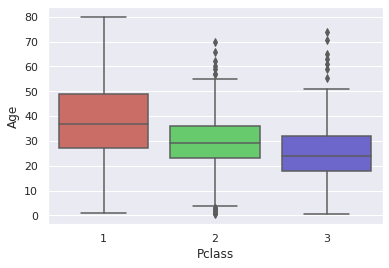

In [130]:
# Using a function to impute missing values for the age column
# But first let's check some stats of the Pclass using a boxplot
sns.boxplot(x='Pclass', y='Age', data=train, palette='hls')

In [131]:
#  The median age for class 1 is around 37, class 2 is 29 and for class 3 around 24

In [132]:
# Using a function to fill the missing values for age
# Writing a function that finds each null value in the age variable, and for each null, 
# checks the value of the Pclass and assigns an age value according to the median age of passengers in that class.
#
def age_approx(cols):
    Age = cols[0]
    Pclass = cols[1]
    
    if pd.isnull(Age):
        if Pclass == 1:
            return 37
        elif Pclass == 2:
            return 29
        else:
            return 24
    else:
        return Age

In [133]:
# Applying the function and checking again for missing values, we see that there are no more null values in the age variable.
#
df['Age'] = df[['Age', 'Pclass']].apply(age_approx, axis=1)
df.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    2
dtype: int64

In [134]:
# Dropping the 2 records in the embarked variable
df.dropna(inplace=True)
df.isnull().sum().any()

False

In [135]:
# Checking for missing values in our validation test
df1.isnull().sum()

Pclass       0
Sex          0
Age         86
SibSp        0
Parch        0
Fare         1
Embarked     0
dtype: int64

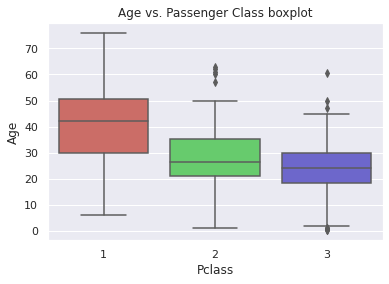

In [136]:
# Viewing the boxplot for the Pclass column in the test data
sns.boxplot(x='Pclass', y='Age', data=test, palette='hls')
plt.title('Age vs. Passenger Class boxplot')
plt.show()

In [137]:
# Dealing with missing values in the validation set as well
# Here we have to tweak the function a bit as the mean age in the validation set is a bit different
def age_approx(cols):
    Age = cols[0]
    Pclass = cols[1]
    
    if pd.isnull(Age):
        if Pclass == 1:
            return 42
        elif Pclass == 2:
            return 29
        else:
            return 24
    else:
        return Age

df1['Age'] = df1[['Age', 'Pclass']].apply(age_approx, axis=1)
df1.isnull().sum()


Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        1
Embarked    0
dtype: int64

In [138]:
# Dropping the 1 missing value
df1 = df1.dropna()
df1.isnull().sum().any()

False


**Checking for outliers**

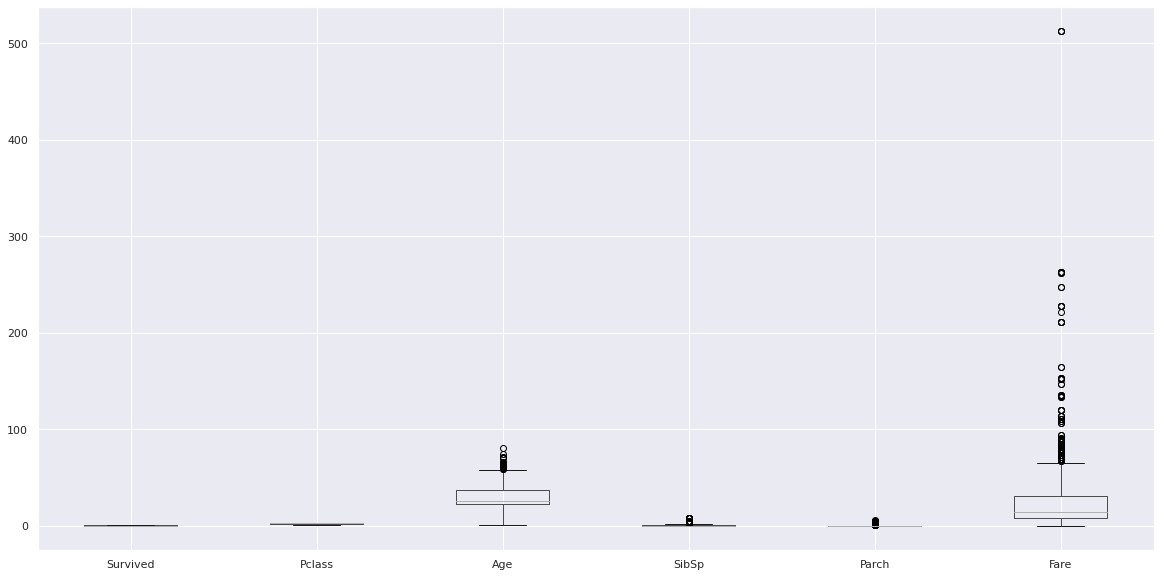

In [139]:
# Using a boxplot to check for outliers
df.boxplot(figsize=(20,10))
plt.show()

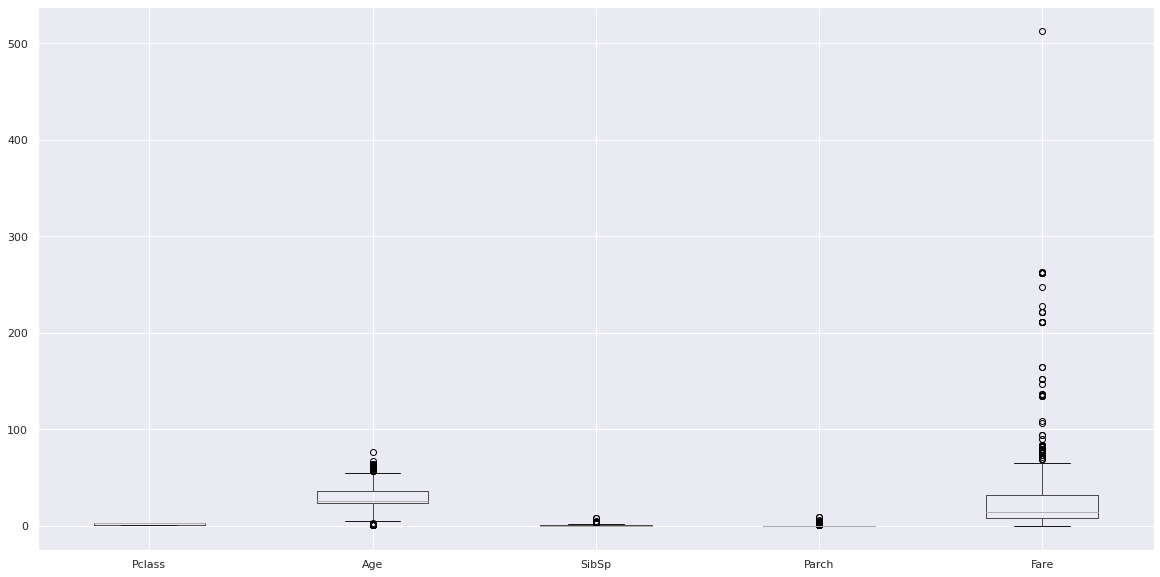

In [140]:
# Using a boxplot to check for outliers in the validation set
df1.boxplot(figsize=(20,10))
plt.show()

The passenger class and survived variables are categorical hece they have no outliers. The fare, age and number of sibling spouses have a few outliers but this does not deviate from our expectations since there are usually deviations from a population sample. We will therefore use them as they are since they are viable.

**4. Exploratory Data Analysis**

In [141]:
# Frequency count of the survived variable 
# 0 represents those who did not survive and 1 who survived
# Replacing 1 as yes and 0 as no. 
data = df.copy()
data["Survived"] = data["Survived"].map({1:"yes" , 0 :"no"})
data["Survived"].value_counts()

no     549
yes    340
Name: Survived, dtype: int64

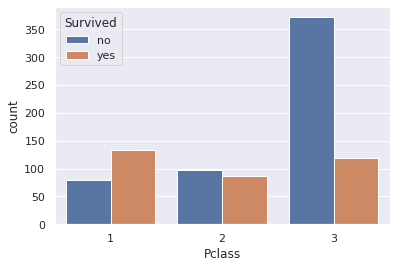

In [142]:
# Countplot of survival and passenger class
sns.countplot(x=data['Pclass'],hue=data['Survived'], data=data)
plt.show()


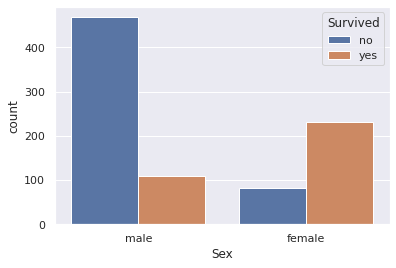

In [143]:
# Countplot of survived and sex variables
sns.countplot(x=data['Sex'],hue=data['Survived'], data=data)
plt.show()


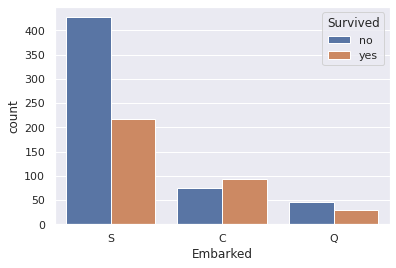

In [144]:
# Countplot of survived and embarked features
sns.countplot(x=data['Embarked'],hue=data['Survived'], data=data)
plt.show()

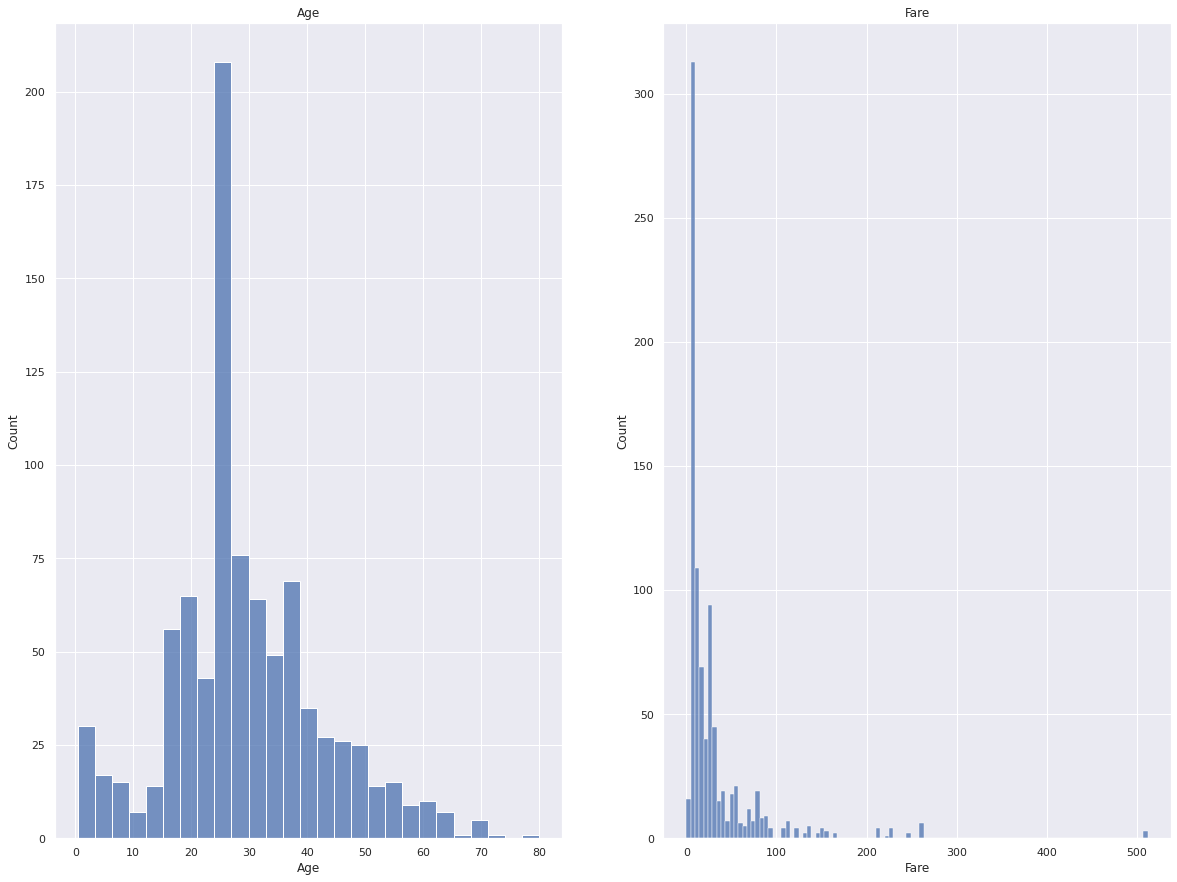

In [145]:
# Distributions for the continous variables
columns_dict = {'Age':1, 'Fare':2}
plt.figure(figsize=(20,15))
for variable,i in columns_dict.items():
  plt.subplot(1,2,i)
  sns.histplot(df[variable])
  sns.set(style='darkgrid')
  plt.title(variable)
plt.show()


In [146]:
# Viewing the correlation matrix
df.corr()

,Survived,Pclass,Age,SibSp,Parch,Fare
Survived,1.000000,-0.335549,-0.052051,-0.034040,0.083151,0.255290
Pclass,-0.335549,1.000000,-0.405549,0.081656,0.016824,-0.548193
Age,-0.052051,-0.405549,1.000000,-0.242807,-0.170089,0.120938
SibSp,-0.034040,0.081656,-0.242807,1.000000,0.414542,0.160887
Parch,0.083151,0.016824,-0.170089,0.414542,1.000000,0.217532
Fare,0.255290,-0.548193,0.120938,0.160887,0.217532,1.000000


From the observations in this section, our data is not imbalanced as the labels for the survived variable are not extremely different. For the passengers travelling in first class had higher chances of surviving compared to the other classes. Many passengers in 3rd class died and those who survived were less. Also more females than males survived. Most of the people who boarded the ship in Southampton died compared to those that embarked from Cherbourg and Queenstown. Most of the passengers in the Titanic were in their mid ages. From the correlation matrix, it is clear that the passenger class and the amount of fare paid is srongly negatively correlated. Those in first class paid higher fares compared to the others and they had higher chances of survival. 

**5. Implementing the Solution**

In [147]:
# Converting the categorical columns to numeric using the label encoder
label_encoder = LabelEncoder()
df['Sex'] = label_encoder.fit_transform(df['Sex'])
df['Embarked'] = label_encoder.fit_transform(df['Embarked'])
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.0,1,0,7.2500,2
1,1,1,0,38.0,1,0,71.2833,0
2,1,3,0,26.0,0,0,7.9250,2
3,1,1,0,35.0,1,0,53.1000,2
4,0,3,1,35.0,0,0,8.0500,2


In [148]:
# Label encoding the validation dataset as well
df1['Sex'] = label_encoder.fit_transform(df1['Sex'])
df1['Embarked'] = label_encoder.fit_transform(df1['Embarked'])
df1.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,1,34.5,0,0,7.8292,1
1,3,0,47.0,1,0,7.0000,2
2,2,1,62.0,0,0,9.6875,1
3,3,1,27.0,0,0,8.6625,2
4,3,0,22.0,1,1,12.2875,2


In [149]:
# Defining our features and target variable
X = df.drop(['Survived'], axis=1)
y = df['Survived']

In [150]:
# Splitting the training data into train and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [151]:
# Initialising the KNN Classifier
knn_classifier = KNeighborsClassifier()

# Fitting the model
knn_classifier.fit(X_train, y_train)

# Running the prediction
y_pred = knn_classifier.predict(X_test)

In [152]:
# Getting the evaluation metrics
print("Confusion Matrix:", metrics.confusion_matrix(y_test, y_pred))
print("Classification Report:", metrics.classification_report(y_test, y_pred))

Confusion Matrix: [[80 25]
 [30 43]]
Classification Report:               precision    recall  f1-score   support

           0       0.73      0.76      0.74       105
           1       0.63      0.59      0.61        73

    accuracy                           0.69       178
   macro avg       0.68      0.68      0.68       178
weighted avg       0.69      0.69      0.69       178



In [153]:
# Running the prediction with the validation set
validation_df = df1.iloc[1:178]
y_validation_predicted = knn_classifier.predict(validation_df)
y_validation_predicted

array([0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0,
       1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0])

In [154]:
# Evaluating the accuracy score 
# Picking the first 178 samples to compare with y_true to eliminate # Inconsistent number of samples
compar = y_test[1:178]

print("Classification Report:", metrics.classification_report(compar, y_validation_predicted))
print("Accuracy Score:", metrics.accuracy_score(compar, y_validation_predicted))

Classification Report:               precision    recall  f1-score   support

           0       0.55      0.64      0.59       104
           1       0.33      0.25      0.28        73

    accuracy                           0.48       177
   macro avg       0.44      0.45      0.44       177
weighted avg       0.46      0.48      0.46       177

Accuracy Score: 0.480225988700565


**Splitting with 70-30 proportions**

In [156]:
# Splitiing with 70-30 proportions
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [157]:
# Initialising the KNN Classifier
knn_classifier = KNeighborsClassifier()

# Fitting the model
knn_classifier.fit(X_train, y_train)

# Running the prediction
y_pred = knn_classifier.predict(X_test)

# Getting the evaluation metrics
print("Classification Report:", metrics.classification_report(y_test, y_pred))

Classification Report:               precision    recall  f1-score   support

           0       0.73      0.77      0.75       157
           1       0.64      0.59      0.62       110

    accuracy                           0.70       267
   macro avg       0.69      0.68      0.68       267
weighted avg       0.69      0.70      0.69       267



In [158]:
# With the validation set
validation_df = df1.iloc[1:179]
y_validation_predicted = knn_classifier.predict(validation_df)

compar = y_test[1:178]
compar1 = y_validation_predicted[1:178]
print("Classification Report:", metrics.classification_report(compar, compar1))
print("Accuracy Score:", metrics.accuracy_score(compar, compar1))


Classification Report:               precision    recall  f1-score   support

           0       0.61      0.69      0.65       104
           1       0.46      0.37      0.41        73

    accuracy                           0.56       177
   macro avg       0.53      0.53      0.53       177
weighted avg       0.55      0.56      0.55       177

Accuracy Score: 0.559322033898305


**Splitting with 60-40 proportions**

In [159]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=0)

In [160]:
# Initialising the KNN Classifier
knn_classifier = KNeighborsClassifier()

# Fitting the model
knn_classifier.fit(X_train, y_train)

# Running the prediction
y_pred = knn_classifier.predict(X_test)

# Getting the evaluation metrics
print("Classification Report:", metrics.classification_report(y_test, y_pred))

Classification Report:               precision    recall  f1-score   support

           0       0.75      0.76      0.76       216
           1       0.62      0.61      0.62       140

    accuracy                           0.70       356
   macro avg       0.69      0.69      0.69       356
weighted avg       0.70      0.70      0.70       356



In [161]:
# With the validation set
validation_df = df1.iloc[1:179]
y_validation_predicted = knn_classifier.predict(validation_df)

# Evaluating the accuracy score 
# Picking the first 178 samples to compare with y_true to eliminate # Inconsistent number of samples
compar = y_test[1:178]
compar_val = y_validation_predicted[1:267]
print("Classification Report:", metrics.classification_report(compar, compar_val))
print("Accuracy Score:", metrics.accuracy_score(compar, compar_val))
print("F1 Score:", metrics.f1_score(compar, compar_val))

Classification Report:               precision    recall  f1-score   support

           0       0.62      0.66      0.64       104
           1       0.47      0.42      0.45        73

    accuracy                           0.56       177
   macro avg       0.55      0.54      0.54       177
weighted avg       0.56      0.56      0.56       177

Accuracy Score: 0.5649717514124294
F1 Score: 0.4460431654676259


Generally, the accuracy score of the model slightly improves with increasing the splitting test size from 0.2 to 0.3 to 0.4. The accuracy score on the validation set also improves with increasing the test size. Something that stands out is that the accuracy on the validation set is way lower compared to that that was used in fitting the training/test data.

**7. Challenging the Solution**

Here, we implement different ways to see if we can improve the performance of our model using the following ways:



*   Using the distance metric
*   Applying weighted voting
*   Applying different nearest neighbors algorithms



In [162]:
k_range = list(range(1, 31))
for k in k_range:
    knn_classifier = KNeighborsClassifier(n_neighbors=k)
metric_params = ['euclidean', 'manhattan']
weights_params = ['distance']
algorithm_params = ['ball_tree', 'kd_tree', 'brute']

parameters = dict(n_neighbors=k_range, metric=metric_params, weights=weights_params, algorithm=algorithm_params)
parameters

{'algorithm': ['ball_tree', 'kd_tree', 'brute'],
 'metric': ['euclidean', 'manhattan'],
 'n_neighbors': [1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30],
 'weights': ['distance']}

In [163]:
# Initialising a gridsearch
knn = KNeighborsClassifier(n_neighbors=k)
grid = GridSearchCV(knn, parameters, cv=5, scoring='accuracy', verbose=1)
grid.fit(X, y)

Fitting 5 folds for each of 180 candidates, totalling 900 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 900 out of 900 | elapsed:    5.2s finished


GridSearchCV(cv=5, error_score=nan,
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=30, p=2,
                                            weights='uniform'),
             iid='deprecated', n_jobs=None,
             param_grid={'algorithm': ['ball_tree', 'kd_tree', 'brute'],
                         'metric': ['euclidean', 'manhattan'],
                         'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                         13, 14, 15, 16, 17, 18, 19, 20, 21, 22,
                                         23, 24, 25, 26, 27, 28, 29, 30],
                         'weights': ['distance']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='accuracy', verbose=1)

In [164]:
print(grid.best_score_)
print(grid.best_params_)

0.7491906303561227
{'algorithm': 'ball_tree', 'metric': 'manhattan', 'n_neighbors': 17, 'weights': 'distance'}


In [168]:
# Applying the best parameters to the 60-40 splitting proportions
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=0)

# Initialising the KNN Classifier
knn_classifier = KNeighborsClassifier(metric='manhattan', n_neighbors=17, weights='distance', algorithm='ball_tree')

# Fitting the model
knn_classifier.fit(X_train, y_train)

# Running the prediction
y_pred = knn_classifier.predict(X_test)

# Getting the evaluation metrics
print("Classification Report:", metrics.classification_report(y_test, y_pred))


Classification Report:               precision    recall  f1-score   support

           0       0.75      0.82      0.78       216
           1       0.68      0.58      0.62       140

    accuracy                           0.72       356
   macro avg       0.71      0.70      0.70       356
weighted avg       0.72      0.72      0.72       356



In [170]:
# With the validation set
validation_df = df1.iloc[1:179]
y_validation_predicted = knn_classifier.predict(validation_df)

# Evaluating the accuracy score 
# Picking the first 178 samples to compare with y_true to eliminate # Inconsistent number of samples
compar = y_test[1:178]
compar_val = y_validation_predicted[1:178]
print("Classification Report:", metrics.classification_report(compar, compar_val))
print("Accuracy Score:", metrics.accuracy_score(compar, compar_val))
print("F1 Score:", metrics.f1_score(compar, compar_val))

Classification Report:               precision    recall  f1-score   support

           0       0.62      0.73      0.67       104
           1       0.49      0.37      0.42        73

    accuracy                           0.58       177
   macro avg       0.56      0.55      0.55       177
weighted avg       0.57      0.58      0.57       177

Accuracy Score: 0.5819209039548022
F1 Score: 0.421875


The hyperparameter tuning improves the accuracy score of the test data to a 72% from a 70%. With the validation set, it's accuracy score also steadily improves from a 56% to 58% but its F1 Score drops a bit indicating that there's poor precision and poor recall in the models created. Further investigation should be carried out to determine why the models performance reduces when it is applied on the validation set(unseen data). 

**8. Follow up Questions**

**a) Did we have the right data?**

Yes, we had the right data

**b) Do we need other data to answer the questions?**

No, other data is needed for this task, however, different algorithms can be implemented to see which algorithm best classifies the survival chances of the titanic passengers

**c) Did we have the right questions?**

Yes, we had the right questions relevant to our prediction goals.